In [31]:
import os
import matplotlib.pyplot as plt
import re
import sys
import numpy as np
from scipy.stats import norm
import scipy.integrate as integrate
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm

import pandas as pd
font_size=25
lw=4

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 


dtlist = np.array([0.003,0.0039,0.005,0.0065,0.0084,0.0109,0.014,0.0181,0.0234,0.0302])
s=10
c=0.45
tau=0.1

def U(x,y):
    res=s*(x*x+y*y-1)*(x*x+y*y-1)
    return res
def openCfile(file):
    """
    Open the C txt file in order to obtain a matrix of results 
    -----------
    Input
    -----------
    file: txt file
        a file containing the results from the C simulation

    Return
    -----------
    mat: list of list
        A matrix containing the results of the simulations 
    """
    with open(file) as f:
        cols = f.readlines() #columns in the txt file
    n_col = len(cols) #number of columns in the text file
    mat=[] # matrix 
    for i in range(n_col): # for each columns 
        elems_i=cols[i].split(" ") #split the elements using " "
        col_i=[] #create an empty column i 
        for elem in elems_i: #for each element of the list 
            if elem!="\n" and elem!=" ": #compare each elements and discard " " and "\n"
                col_i.append(float(elem)) #append elems that are floats to the vector of interest
        mat.append(col_i) #create the matrix
    mat=np.array(mat)
    return(mat) #return the value of the matrix.


# Anisotropic potential

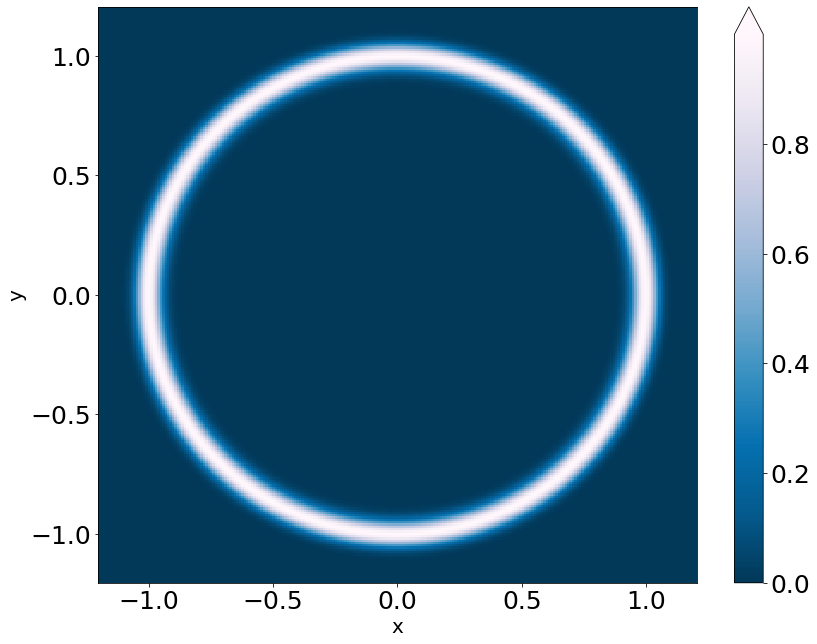

In [32]:
####################
##
#####################
tau=0.1
s=10
fig, (axs)= plt.subplots(1, 1,figsize=(13,10))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
####################
## True distribution
#####################
beta=1/0.1
nbins=250
bound=1.2
X = np.linspace(-bound,bound,nbins)
Y = np.linspace(-bound,bound,nbins)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-beta*s*(X**2 + Y**2-1)**2)
# fig = plt.figure(figsize=(20, 6))
# axs.set_title('True distribution',fontsize=font_size,y=1.1)
axs.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=np.min(Z), vmax=1))
pcm = axs.pcolor(X, Y, Z, cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=axs, extend='max')
axs.set_ylabel("y",fontsize=font_size*0.8)
axs.set_xlabel("x",fontsize=font_size*0.8)
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/overdamped/visualisation")

fig.savefig("figures/anisotropic_2d_plot.eps")

# Adaptive function 

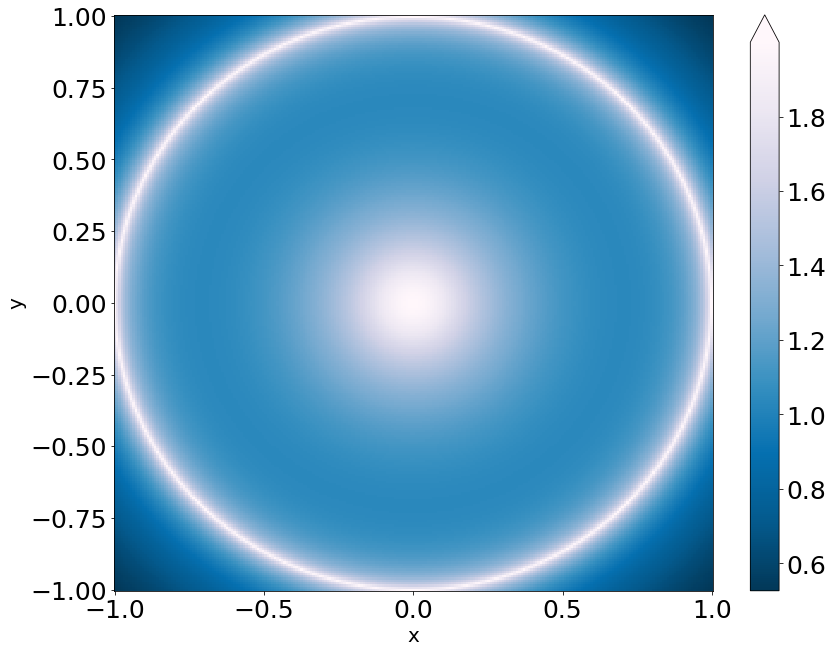

In [33]:
####################
##
#####################
tau=0.1
s=10
c=0.5
m1=5          
M1=1./2.  

fig, (axs)= plt.subplots(1, 1,figsize=(13,10))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
####################
## True distribution
#####################
beta=1/0.1
nbins=250
bound=1.
X = np.linspace(-bound,bound,nbins)
Y = np.linspace(-bound,bound,nbins)
X, Y = np.meshgrid(X, Y)
F = abs(c*s*(X**2 + Y**2-1)*(X**2+Y**2))
F2=F*F
Xi=np.sqrt(1+m1*F)
G=(Xi/(M1*Xi+F))

# fig = plt.figure(figsize=(20, 6))
# axs.set_title('True distribution',fontsize=font_size,y=1.1)
axs.pcolormesh(X, Y, G, norm=colors.LogNorm(vmin=np.min(G), vmax=np.max(G)))
pcm = axs.pcolor(X, Y, G, cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=axs, extend='max')
axs.set_ylabel("y",fontsize=font_size*0.8)
axs.set_xlabel("x",fontsize=font_size*0.8)
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/overdamped/visualisation")

fig.savefig("figures/anisotropic_2d_gfunc.eps")

## Compute moments 
$$
 \int_\Omega \exp(-\beta (x^2+y^2-1)^2) x dx =0\\
\int_\Omega \exp(-\beta (x^2+y^2-1)^2) y dy =0\\
\int_\Omega  \exp(-\beta (x^2+y^2-1)^2) U(x,y) dx dy=0.049 \dots
$$

In [18]:
## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
range_int=[-15,15]
a=range_int[0]
b=range_int[1]
# norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), a,b)[0],16)
# true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U/tau)*U, a,b)[0],16)/norm
# true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, a,b)[0],16)/norm
# true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, a,b)[0],16)/norm
# true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, a,b)[0],16)/norm



def target(x,y):
    return np.exp(-U(x,y)/tau)

def mom_3(x,y):

   return np.exp(-U(x,y)/tau)*U(x,y)
normalising_cst=integrate.dblquad(target,a,b,a,b)[0]
print(normalising_cst)
true_mom_3=integrate.dblquad(mom_3,a,b,a,b)[0]/normalising_cst
print(true_mom_3)

0.5568327996749912
0.0499999999930208


In [2]:
true_mom_1=0
true_mom_2=0
true_mom_3=0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


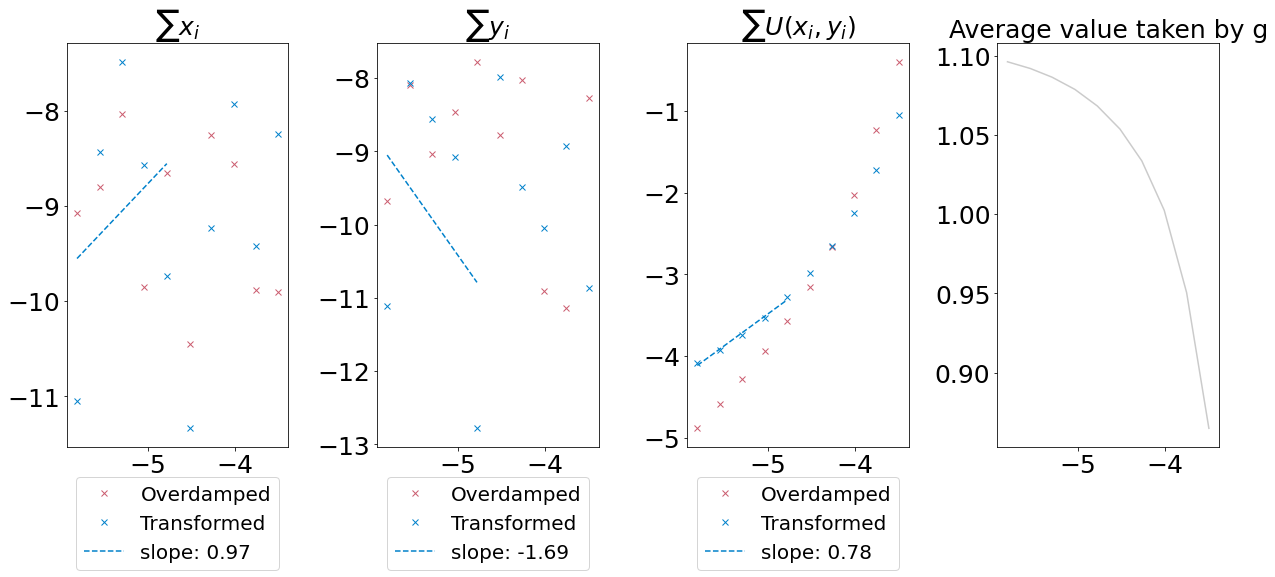

In [29]:
# from settings_and_potential_eddie import *

# ###########################################
# ## Set up the path
# ###########################################
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie")


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= np.log(dtlist)
lb=0
ub=-5
x = np.log(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(20,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax1.set_title("$\\sum x_i$",fontsize=font_size)
ax2.set_title("$\\sum y_i$",fontsize=font_size)
ax3.set_title("$\\sum U(x_i,y_i)$",fontsize=font_size)
ax4.set_title("Average value taken by g",fontsize=font_size)

## no adaptive 
###############
lab="Overdamped"

# Upload moments
mom1_list=np.hstack(openCfile("overdamped_2d/noada_moment1.txt"))
mom2_list=np.hstack(openCfile("overdamped_2d/noada_moment2.txt"))
mom3_list=np.hstack(openCfile("overdamped_2d/noada_moment3.txt"))
# mom4_list=np.hstack(openCfile("overdamped_2d/noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)


#Plot moments
ax1.plot(xm,np.log(mom1_list),"x",color=myred,label=lab)
ax2.plot(xm,np.log(mom2_list),"x",color=myred,label=lab)
ax3.plot(xm,np.log(mom3_list),"x",color=myred,label=lab)
# ax4.plot(xm,np.log(mom4_list),"x",color=myred,label=lab)


## Transformed 
###############
lab="Transformed"

# Upload moments
mom1_list=np.hstack(openCfile("overdamped_2d/tr_moment1.txt"))
mom2_list=np.hstack(openCfile("overdamped_2d/tr_moment2.txt"))
mom3_list=np.hstack(openCfile("overdamped_2d/tr_moment3.txt"))
g_vals=np.hstack(openCfile("overdamped_2d/tr_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)

ax1.plot(xm,np.log(mom1_list),"x",color=myblue,label=lab)
ax2.plot(xm,np.log(mom2_list),"x",color=myblue,label=lab)
ax3.plot(xm,np.log(mom3_list),"x",color=myblue,label=lab)
ax4.plot(xm,g_vals,"-",color=mygrey,label=lab)


## interpolation linear  
#first moment
m, c = np.linalg.lstsq(A, np.log(mom1_list)[lb:ub], rcond=None)[0]
ax1.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#second moment
m, c = np.linalg.lstsq(A, np.log(mom2_list)[lb:ub], rcond=None)[0]
ax2.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#third moment
m, c = np.linalg.lstsq(A, np.log(mom3_list)[lb:ub], rcond=None)[0]
ax3.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
# #fourth moment
# m, c = np.linalg.lstsq(A, np.log(mom4_list)[lb:ub], rcond=None)[0]
# ax4.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)


ax1.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax2.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax3.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
# ax4.legend(fontsize=font_size*0.8,ncol=1,loc="upper center",bbox_to_anchor=(0.5, -0.05))

os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations")

fig.savefig("figures/moments_logplot_overdamped_2d.eps")


